<a href="https://colab.research.google.com/github/Ferst1/Olena-Kaspruk/blob/main/Python_lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Отримання данних

In [28]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
response=requests.get("https://uadata.net/it-industry/programming-languages.json")
data_json=response.json()

Створення DataFrame

In [6]:
df=pd.DataFrame(data_json["data"])

In [7]:
df.head()

,at,val
0,2022-05-20,15916
1,2022-05-21,15633
2,2022-05-22,15218
3,2022-05-23,15370
4,2022-05-24,15876


In [8]:
df.shape

(418, 2)

In [9]:
df.columns

Index(['at', 'val'], dtype='object')

In [10]:
df.dtypes

at     object
val     int64
dtype: object

Підготовка даних


In [14]:
df["at"] = pd.to_datetime(df["at"])

In [16]:
df.dtypes

at     datetime64[ns]
val             int64
dtype: object

In [17]:
df=df.rename(columns={"at":"Дата","val": "Вакансіі"})

In [20]:
df.head()

,Вакансіі
Дата,
2022-05-20,15916
2022-05-21,15633
2022-05-22,15218
2022-05-23,15370
2022-05-24,15876


In [19]:
df.set_index("Дата",inplace=True)

Побудова графікіф

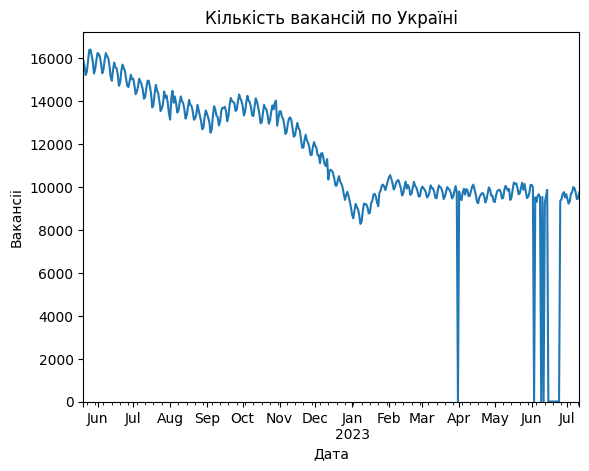

In [30]:
df["Вакансіі"].plot()
plt.title("Кількість вакансій по Україні")
plt.xlabel("Дата")
plt.ylabel("Вакансіі")
plt.ylim(bottom=0)
plt.show()

In [32]:
df["Вакансіі"]=df["Вакансіі"].replace(0,np.nan)
df ["Вакансіі"]=df["Вакансіі"].interpolate()

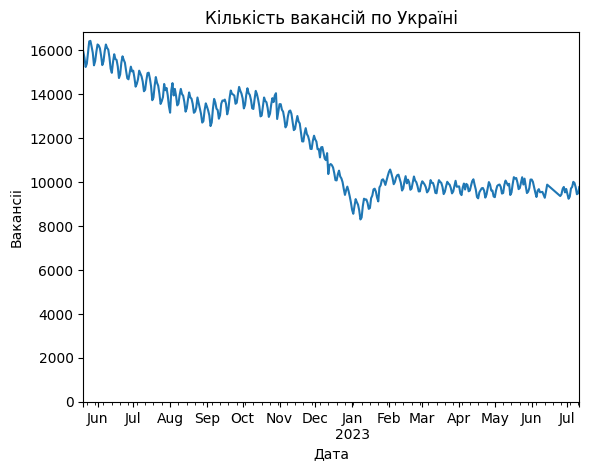

In [33]:
df["Вакансіі"].plot()
plt.title("Кількість вакансій по Україні")
plt.xlabel("Дата")
plt.ylabel("Вакансіі")
plt.ylim(bottom=0)
plt.show()

In [37]:
from pandas.core import window
df["rolling_mean"] =df["Вакансіі"].rolling(window=7).mean()

In [38]:
df

,Вакансіі,rolling_mean
Дата,,
2022-05-20,15916.0,NaN
2022-05-21,15633.0,NaN
2022-05-22,15218.0,NaN
2022-05-23,15370.0,NaN
2022-05-24,15876.0,NaN
...,...,...
2023-07-07,9941.0,9626.000000
2023-07-08,9743.0,9667.428571
2023-07-09,9430.0,9696.857143


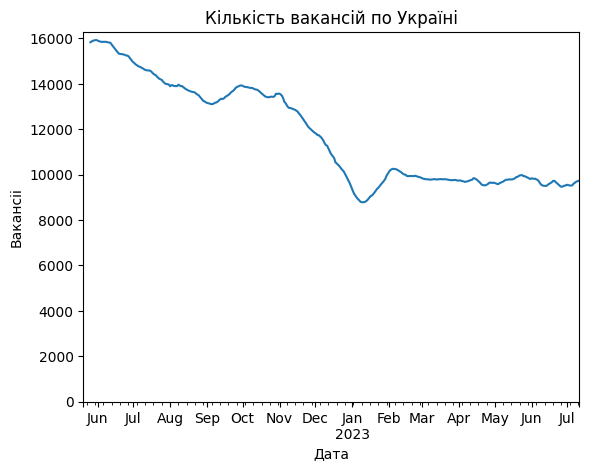

In [39]:
df["rolling_mean"].plot()
plt.title("Кількість вакансій по Україні")
plt.xlabel("Дата")
plt.ylabel("Вакансіі")
plt.ylim(bottom=0)
plt.show()

In [40]:
df.describe()

,Вакансіі,rolling_mean
count,418.000000,412.000000
mean,11745.215311,11731.980236
std,2242.026248,2208.071272
min,8282.000000,8779.857143
25%,9736.000000,9756.214286
50%,10699.000000,10625.571429
75%,13738.500000,13710.178571
max,16407.000000,15926.285714
